### **1. 와인 경작자 분류**

In [1]:
#코드 11-1
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [7]:
#코드 11-2
import pandas as pd
import numpy as np

wine_feature = wine.data
wine_label = wine.target

df_wine = pd.DataFrame(data=wine_feature, columns=[wine.feature_names])
df_wine['label'] = wine_label
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (alcohol,)                       178 non-null    float64
 1   (malic_acid,)                    178 non-null    float64
 2   (ash,)                           178 non-null    float64
 3   (alcalinity_of_ash,)             178 non-null    float64
 4   (magnesium,)                     178 non-null    float64
 5   (total_phenols,)                 178 non-null    float64
 6   (flavanoids,)                    178 non-null    float64
 7   (nonflavanoid_phenols,)          178 non-null    float64
 8   (proanthocyanins,)               178 non-null    float64
 9   (color_intensity,)               178 non-null    float64
 10  (hue,)                           178 non-null    float64
 11  (od280/od315_of_diluted_wines,)  178 non-null    float64
 12  (proline,)            

In [9]:
#코드 11-3
from sklearn.model_selection import train_test_split

df_wine = df_wine.astype({'label':'int'})
train, test = train_test_split(df_wine, test_size=0.3, random_state=0,
                               stratify=df_wine['label'])

train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]

test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0,0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0,0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0,2
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1


In [14]:
#코드 11-4
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#학습하기
model = KNeighborsClassifier()
model.fit(train_X, train_Y)

#테스트와 평가하기
pred_knn = model.predict(test_X)
print('KNN 알고리즘 분류 정확도:', metrics.accuracy_score(pred_knn, test_Y))

KNN 알고리즘 분류 정확도: 0.7222222222222222


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


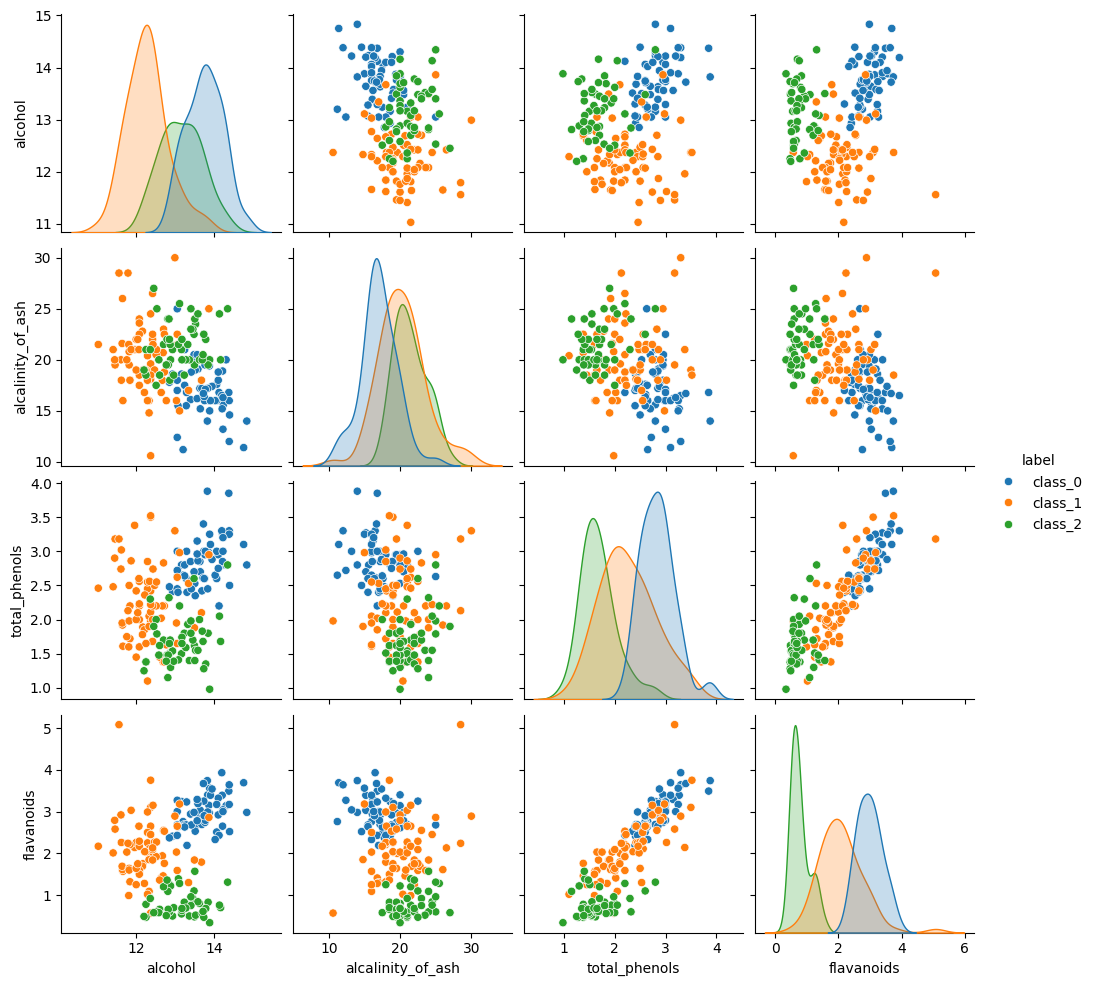

In [15]:
#코드 11-5
import seaborn as sns

df_analysis = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_class = pd.Series(wine.target, dtype='category')
wine_class = wine_class.cat.rename_categories(wine.target_names)
df_analysis['label'] = wine_class

sns.pairplot(vars=['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'],\
             hue='label', data=df_analysis)

In [18]:
#코드 11-6
from sklearn.ensemble import RandomForestClassifier

df_wine_proc = df_wine.drop(labels=['alcalinity_of_ash', 'total_phenols',
                                    'proanthocyanins'], axis=1)
df_wine_proc = df_wine_proc.astype({'label':'int'})

train, test = train_test_split(df_wine_proc, test_size=0.3, random_state=0,\
                               stratify=df_wine_proc['label'])
train_X=train[train.columns[:10]]
train_Y=train[train.columns[10:]]
test_X=test[test.columns[:10]]
test_Y=test[test.columns[10:]]

model = RandomForestClassifier(n_estimators=3)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF, test_Y))

랜덤 포레스트 알고리즘 분류 정확도: 0.9629629629629629


C:\Users\asia\AppData\Local\Temp\ipykernel_11016\3512512150.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_wine_proc = df_wine.drop(labels=['alcalinity_of_ash', 'total_phenols',
C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### **2. 화이트와인과 레드와인 분류**

In [20]:
#코드 11-7
import numpy as np
import pandas as pd
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv', sep=';')

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [21]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
#코드 11-8
df_white['class'] = 1
df_red['class'] = 0

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [24]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [23]:
#코드 11-9
df_wine_category = pd.concat([df_white, df_red])

In [25]:
#코드 11-10
from sklearn.model_selection import train_test_split

df_wine_category = df_wine_category.astype({'class':'int'})
train, test = train_test_split(df_wine_category, test_size=0.3, random_state=0,\
                               stratify=df_wine_category['class'])

train_X = train[train.columns[:12]]
train_Y = train[train.columns[12:]]
test_X = test[test.columns[:12]]
test_Y = test[test.columns[12:]]

train_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2126,6.5,0.43,0.28,12.0,0.056,23.0,174.0,0.99860,3.31,0.55,9.3,5
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.6,6
725,6.4,0.39,0.21,1.2,0.041,35.0,136.0,0.99225,3.15,0.46,10.2,5
4557,6.1,0.37,0.46,12.0,0.042,61.0,210.0,0.99700,3.17,0.59,9.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8
2032,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6
3239,6.6,0.34,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6


In [26]:
#코드 11-11
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [27]:
#코드 11-12
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
pred_SVM = model.predict(test_X)

print('SVM 알고리즘 분류 정확도:', metrics.accuracy_score(pred_SVM, test_Y))
print(classification_report(pred_SVM, test_Y))

SVM 알고리즘 분류 정확도: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.99      0.99      0.99      1484

    accuracy                           0.98      1950
   macro avg       0.97      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#코드 11-13
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

print('Random Forest 알고리즘 분류 정확도:', metrics.accuracy_score(pred_RF,test_Y))
print(classification_report(pred_RF,test_Y))

Random Forest 알고리즘 분류 정확도: 0.9938461538461538
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       478
           1       1.00      1.00      1.00      1472

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
